In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 3000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 15s 7us/step


In [2]:
import numpy as np


def vectorize_sequences(sequences, dimention = 3000):
    results = np.zeros((len(sequences),dimention))
    for i , sequence in enumerate(sequences):
        results[i, sequence] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(3000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:

history = model.fit(partial_x_train, partial_y_train , epochs=9, batch_size=256, validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 84us/step - loss: 2.1662 - accuracy: 0.5837 - val_loss: 1.4520 - val_accuracy: 0.6910
Epoch 2/9
7982/7982 [==============================] - 1s 65us/step - loss: 1.2306 - accuracy: 0.7319 - val_loss: 1.1821 - val_accuracy: 0.7410
Epoch 3/9
7982/7982 [==============================] - 0s 58us/step - loss: 0.9530 - accuracy: 0.7937 - val_loss: 1.0839 - val_accuracy: 0.7500
Epoch 4/9
7982/7982 [==============================] - 0s 51us/step - loss: 0.7591 - accuracy: 0.8334 - val_loss: 0.9539 - val_accuracy: 0.7920
Epoch 5/9
7982/7982 [==============================] - 1s 65us/step - loss: 0.6131 - accuracy: 0.8656 - val_loss: 0.9070 - val_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 66us/step - loss: 0.4993 - accuracy: 0.8925 - val_loss: 0.8616 - val_accuracy: 0.8120
Epoch 7/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.4087 - ac

[2.16618231522114, 1.2306393543839365, 0.9529934485912681, 0.7591065983669527, 0.6131076367688161, 0.49933269003135944, 0.40866115775152545, 0.34288054063218004, 0.2895525552237192]
[1.4520331001281739, 1.1820565700531005, 1.0838960161209106, 0.953938136100769, 0.9070129828453064, 0.8615911917686463, 0.8918773760795593, 0.9006059918403625, 0.8938123893737793]


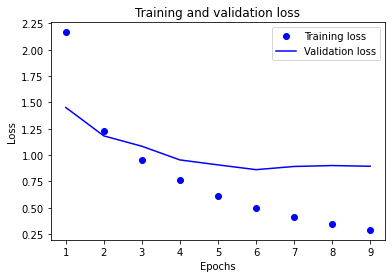

In [8]:
import matplotlib.pyplot as plt

plt.cla()
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss)
print(val_loss)

epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

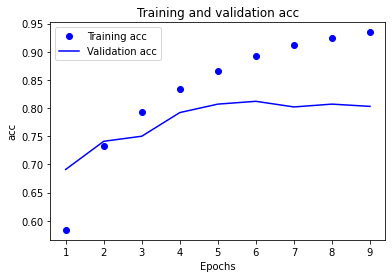

In [9]:
plt.cla()
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')

plt.legend()

plt.show()

In [10]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

2246/2246 [==============================] - 0s 78us/step
[0.969888999434528, 0.7845057845115662]
